# 张量的创建

## （1）基本创建方式

In [3]:
"""torch.tensor()"""
import torch
import numpy as np

# 创建张量标量
data = torch.tensor(10)
print(data)

# numpy数组
data = np.random.randn(2, 3)
data = torch.tensor(data)
print(data)

# 列表
data = [[10.,20.,30.],[40.,50.,60.]]
data = torch.tensor(data)
print(data)

tensor(10)
tensor([[-0.0473, -1.0526,  3.1675],
        [-1.9171,  2.3614, -0.3417]], dtype=torch.float64)
tensor([[10., 20., 30.],
        [40., 50., 60.]])


In [4]:
"""torch.Tensor()"""

# 创建2行3列的张量
data = torch.Tensor(2, 3)
print(data)

data = torch.Tensor([10])
print(data)

data = torch.Tensor([10, 20])
print(data)

tensor([[1.3602e-05, 1.0470e-11, 1.7250e-07],
        [1.0860e-05, 4.4150e-05, 4.0372e-08]])
tensor([10.])
tensor([10., 20.])


## (2)创建线性和随机张量

In [5]:
"""torch.arrange()      torch.lin space()"""
data = torch.arange(0,10,2)
print(data)

data = torch.linspace(0,9,10)
print(data)

tensor([0, 2, 4, 6, 8])
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])


In [6]:
"""torch.randn()创建随机张量"""
data = torch.randn(2, 3)

# 查看随机数种子
print('随机数种子：',torch.random.initial_seed())

# 随机数种子设置
torch.random.manual_seed(100)
print(data)
print('随机数种子：',torch.random.initial_seed())

随机数种子： 18736806469100
tensor([[ 0.6308,  0.3703,  0.7738],
        [-0.4629, -0.3190,  1.8335]])
随机数种子： 100


## (3)创建0-1张量

In [7]:
torch.zeros(4, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [8]:
torch.ones(4, 5)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [9]:
data = torch.randn(2, 3)
torch.zeros_like(data)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [10]:
torch.full([4, 5], 10)

tensor([[10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10],
        [10, 10, 10, 10, 10]])

In [11]:
torch.full_like(data, 20)

tensor([[20., 20., 20.],
        [20., 20., 20.]])

# 张量的类型转换

## (1)张量元素的类型转换

In [12]:
data = torch.randn(4, 5)
print(data)
print(data.dtype)
print(data.type(torch.IntTensor).dtype)
print(data.int().dtype)

tensor([[ 0.6857,  0.7877, -0.9778,  2.1302, -1.7599],
        [ 1.0230, -0.1107, -0.3899, -1.0300, -1.5446],
        [ 0.5730, -2.0956, -0.1806,  0.2346, -0.1477],
        [ 0.5893,  2.2533, -0.2555,  0.1651, -0.1629]])
torch.float32
torch.int32
torch.int32


## (2)张量转换成Numpy数组

In [13]:
# 共享空间
import torch
import numpy as np

torch.random.manual_seed(2)
data_tensor = torch.randint(0, 10, [2, 3])
print(type(data_tensor))

data_numpy = data_tensor.numpy()
print(type(data_numpy))

data_numpy[0][0] = 100
print(data_numpy)
print(data_tensor)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
[[100   7   1]
 [  4   8   9]]
tensor([[100,   7,   1],
        [  4,   8,   9]])


In [14]:
# 使用copy函数避免空间共享

import torch
import numpy as np

torch.manual_seed(2)
data_tensor = torch.randint(0, 10, [2, 3])
print(type(data_tensor))

data_numpy = data_tensor.numpy().copy()
print(type(data_numpy))

data_numpy[0][0] = 100
print(data_tensor)
print(data_numpy)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
tensor([[8, 7, 1],
        [4, 8, 9]])
[[100   7   1]
 [  4   8   9]]


## (3)Numpy数组转换为张量

In [15]:
# 内存共享
import torch
import numpy as np

data_numpy = np.array([1, 2, 3])
data_tensor = torch.from_numpy(data_numpy)
data_tensor[0] = 10
print(data_numpy)
print(data_tensor)

[10  2  3]
tensor([10,  2,  3], dtype=torch.int32)


In [16]:
# 避免内存共享
import torch
import numpy as np

data_numpy = np.array([1, 2, 3])
data_tensor = torch.from_numpy(data_numpy.copy())
data_tensor[0] = 10
print(data_numpy)
print(data_tensor)

[1 2 3]
tensor([10,  2,  3], dtype=torch.int32)


In [17]:
# 避免内存共享
import torch
import numpy as np

data_numpy = np.array([1, 2, 3])
data_tensor = torch.Tensor(data_numpy)
data_tensor[0] = 10
print(data_numpy)
print(data_tensor)

[1 2 3]
tensor([10.,  2.,  3.])


## (4)标量张量和数字转换

In [18]:
import torch

data = torch.tensor(30)
print(data)
print(data.item())

tensor(30)
30


In [19]:
data1 = torch.tensor([30])
print(data1)
print(data1.item())

tensor([30])
30


# 张量的运算

## (1)张量的基本运算

In [21]:
import torch

torch.random.manual_seed(22)
data = torch.randint(0, 10, [2, 3])
print(data)

print(data.add(10))
print(data) # 原数据并没有发生改变

tensor([[9, 6, 6],
        [4, 2, 2]])
tensor([[19, 16, 16],
        [14, 12, 12]])
tensor([[9, 6, 6],
        [4, 2, 2]])


In [22]:
import torch

torch.random.manual_seed(22)
data = torch.randint(0, 10, [2, 3])
print(data)

print(data.add_(10))
print(data) # 原数据会发生改变

tensor([[9, 6, 6],
        [4, 2, 2]])
tensor([[19, 16, 16],
        [14, 12, 12]])
tensor([[19, 16, 16],
        [14, 12, 12]])


## (2)点乘运算

In [24]:
import torch

torch.random.manual_seed(22)
data1 = torch.randint(0, 10, [2, 3])
print(data1)

torch.random.manual_seed(23)
data2 = torch.randint(0, 10, [2, 3])
print(data2)

# 点乘
print(torch.mul(data1, data2))

print(data1 * data2)

tensor([[9, 6, 6],
        [4, 2, 2]])
tensor([[1, 6, 6],
        [7, 0, 2]])
tensor([[ 9, 36, 36],
        [28,  0,  4]])
tensor([[ 9, 36, 36],
        [28,  0,  4]])


## (3)矩阵乘法

In [25]:
import torch

torch.random.manual_seed(22)
data1 = torch.randint(0, 10, [2, 4])
print(data1)

torch.random.manual_seed(23)
data2 = torch.randint(0, 10, [4, 5])
print(data2)

# 矩阵乘法
print(data1 @ data2)

print(torch.matmul(data1, data2))

tensor([[9, 6, 6, 4],
        [2, 2, 2, 1]])
tensor([[1, 6, 6, 7, 0],
        [2, 7, 1, 4, 7],
        [5, 6, 3, 7, 8],
        [7, 5, 2, 9, 8]])
tensor([[ 79, 152,  86, 165, 122],
        [ 23,  43,  22,  45,  38]])
tensor([[ 79, 152,  86, 165, 122],
        [ 23,  43,  22,  45,  38]])


# 常见运算函数

In [ ]:
import torch

data = torch.randint(0, 10, [2, 3],dtype = torch.float64)
print(data)

"""计算均值（注意：tensor必须为Float或者Double类型）"""
print(data.mean())
print(data.mean(dim = 0)) # 按列计算均值
print(data.mean(dim = 1)) # 按行进行计算

"""计算总和"""
print(data.sum())
print(data.sum(dim = 0))
print(data.sum(dim = 1))

"""计算平方"""
print(torch.pow(data, 2))

"""计算平方根"""
print(data.sqrt())

"""指数计算"""
print(data.exp())

"""对数计算"""
print(data.log())
print(data.log2())
print(data.log10())

# 张量索引操作

In [28]:
import torch

torch.random.manual_seed(23)
data = torch.randint(0, 10, [4, 5])
print(data)

print(data[[1,3],[1,4]])

print(data[[[1], [3]], [2, 4]])

tensor([[1, 6, 6, 7, 0],
        [2, 7, 1, 4, 7],
        [5, 6, 3, 7, 8],
        [7, 5, 2, 9, 8]])
tensor([7, 8])
tensor([[1, 7],
        [2, 8]])


In [30]:
# 布尔索引
import torch

torch.random.manual_seed(23)
data = torch.randint(0, 10, [4, 5])
print(data)

index = data[:, 2] > 5
print(index)
print(data[index])

tensor([[1, 6, 6, 7, 0],
        [2, 7, 1, 4, 7],
        [5, 6, 3, 7, 8],
        [7, 5, 2, 9, 8]])
tensor([ True, False, False, False])
tensor([[1, 6, 6, 7, 0]])


# 张量形状操作

## (1)reshape函数

In [33]:
import torch

torch.random.manual_seed(22)
data = torch.randint(0, 10, [3, 4, 5])
print(data.shape)
print(data.size())
print(data.shape[2])
print(data.size(2))

print(data.reshape(2, -1, 3).shape)

torch.Size([3, 4, 5])
torch.Size([3, 4, 5])
5
5
torch.Size([2, 10, 3])


## (2)squeeze函数和unsqueeze函数

In [36]:
import torch

torch.random.manual_seed(22)
data = torch.randint(0, 10, [3, 4, 5])

# 添加维度
data1 = data.unsqueeze(dim = 1).unsqueeze(dim = -1)
print(data1.shape)

# 降低维度
print(data1.squeeze().shape)

torch.Size([3, 1, 4, 5, 1])
torch.Size([3, 4, 5])


## (3)transpose函数和permute函数

In [46]:
import torch

torch.random.manual_seed(22)
data = torch.randint(0, 10, [4, 2, 3, 5])
print(data.shape)

# 转换成[3, 4, 5, 2]
data1 = torch.transpose(data, 0, 2)
data2 = torch.transpose(data1, 1, 2)
data3 = torch.transpose(data2, 2, 3)
print(data3.shape)

data4 = torch.permute(data, [2, 0, 3, 1])
print(data4.shape)

print(data.permute([2, 0, 3, 1]).shape)

torch.Size([4, 2, 3, 5])
torch.Size([3, 4, 5, 2])
torch.Size([3, 4, 5, 2])
torch.Size([3, 4, 5, 2])


## (4)view()函数和contiguous()函数

In [53]:
import torch

torch.random.manual_seed(22)
data = torch.randint(0, 10, [2, 3])
print(data.shape)

# 判断内存是否连续
print(data.is_contiguous())

print(data.view(-1).shape)

data1 = torch.transpose(data, 0, 1)
print(data1.is_contiguous()) # 内存不连续

data2 = data1.contiguous()
print(data2.view(-1).shape)

if data.is_contiguous():
    data.view(-1)
else:
    data.contiguous().view(-1)

torch.Size([2, 3])
True
torch.Size([6])
False
torch.Size([6])


# 张量拼接操作

In [57]:
import torch
data1 = torch.randint(0, 10, [1, 2, 3])
data2 = torch.randint(0, 10, [1, 2, 3])
print(data1)
print(data2)

# 1.按0维度拼接
new_data1 = torch.cat([data1, data2], dim = 0)
# print(new_data1)
print(new_data1.shape)

# 2.按1维度拼接
new_data2 = torch.cat([data1, data2], dim = 1)
# print(new_data2)
print(new_data2.shape)

# 3.按2维度拼接
new_data3 = torch.cat([data1, data2], dim = 2)
# print(new_data3)
print(new_data3.shape)

tensor([[[5, 1, 8],
         [8, 9, 5]]])
tensor([[[5, 2, 9],
         [0, 5, 6]]])
torch.Size([2, 2, 3])
torch.Size([1, 4, 3])
torch.Size([1, 2, 6])


# 自动微分模块

In [1]:
"""w = w - L(w.grad)"""
import torch

# 数据  特征+目标
x = torch.tensor(5)
y = torch.tensor(0.)

# 权重  偏置
w = torch.tensor(1, requires_grad=True,dtype = torch.float32)
b = torch.tensor(3, requires_grad=True, dtype = torch.float32)

# 预测
z = w*x + b

# 损失
loss = torch.nn.MSELoss()
loss = loss(z, y)

# 微分
loss.backward()

#梯度
print(w.grad)
print(b.grad)

tensor(80.)
tensor(16.)


In [5]:
import torch

x = torch.ones(2, 5)
y = torch.zeros(2, 3)

w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w) + b

loss = torch.nn.MSELoss()
loss = loss(z, y)

loss.backward()

print(w.grad)
print(b.grad)

tensor([[0.2782, 1.4126, 0.4037],
        [0.2782, 1.4126, 0.4037],
        [0.2782, 1.4126, 0.4037],
        [0.2782, 1.4126, 0.4037],
        [0.2782, 1.4126, 0.4037]])
tensor([0.2782, 1.4126, 0.4037])


# 线性回归案例

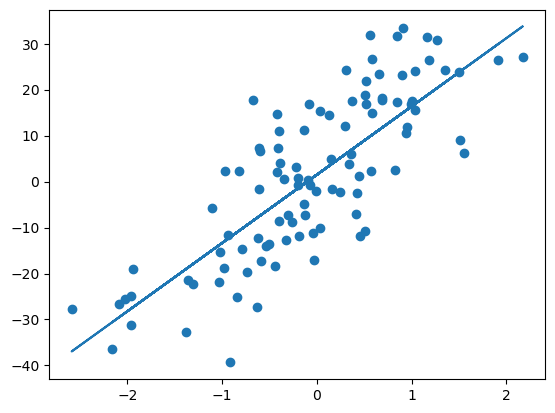

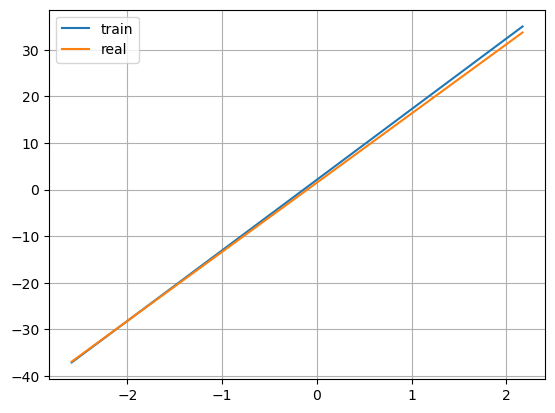

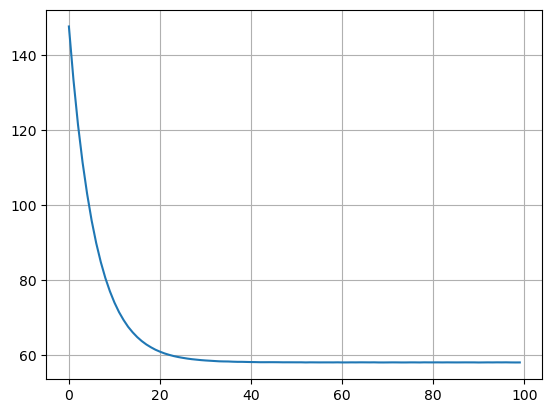

In [11]:
import numpy as np
from sklearn.datasets import make_regression # 构造数据集
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader # 构造适合torch的数据集

# 构建数据集
x, y, coef = make_regression(n_samples=100,
                             n_features=1, # 特征维度
                             noise = 10,
                             coef = True, # 返回斜率
                             bias = 1.5
                             )
plt.scatter(x, y)
y_true = [coef*v+1.5 for v in x]
plt.plot(x, y_true)
plt.show()

# 数据获取（将ndarray转化成tensor）
x = torch.tensor(x)
y = torch.tensor(y)
  # 封装
dataset = TensorDataset(x, y) # 构造适合torch数据集：100个数据
dataloader = DataLoader(dataset = dataset, batch_size=2, shuffle = True) # 构建batch数据
# dataloader = DataLoader(dataset = dataset, batch_size=8, shuffle = True, drop_last = True/False)

# 构建模型
model = torch.nn.Linear(in_features = 1, # 输入x的维度
                        out_features=1 # 输出y的维度
                        )

# 模型训练
# 损失(均方误差)
cri = torch.nn.MSELoss()
# cri = torch.nn.L1Loss()
# cri = torch.nn.SmoothL1Loss()


# 优化器
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.001)
# 遍历（epoch batch）
loss_num = []
for i in range(100):
    sum = 0
    sample = 0
    for x_, y_ in dataloader:
        # 模型预测
        y_pre = model(x_.type(torch.float32))
        # 损失计算
        loss = cri(y_pre, y_.reshape(-1, 1).type(torch.float32))
        sum += loss.item()
        sample += len(y_)
        # 梯度清零
        optimizer.zero_grad()
        # 自动微分
        loss.backward()
        # 更新参数
        optimizer.step()

    loss_num.append(sum/sample)

# 绘制拟合曲线
x = torch.linspace(x.min(), x.max(), 1000)
y1 = torch.tensor([v * model.weight + model.bias for v in x])
y2 = torch.tensor([v*coef + 1.5 for v in x])
plt.plot(x, y1, label = 'train')
plt.plot(x, y2, label = 'real')
plt.grid()
plt.legend()
plt.show()

# 绘制损失函数曲线
plt.plot(range(100), loss_num)
plt.grid()
plt.show()
